<a href="https://colab.research.google.com/github/Anushkak0712/bharat_intern_ml/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
files.upload()



In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Iris.csv')

# Print the dataframe
print(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
species_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

df["Species"] = df["Species"].replace(species_mapping)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [5]:
X=df.drop(["Species","Id"],axis=1)
y=df["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

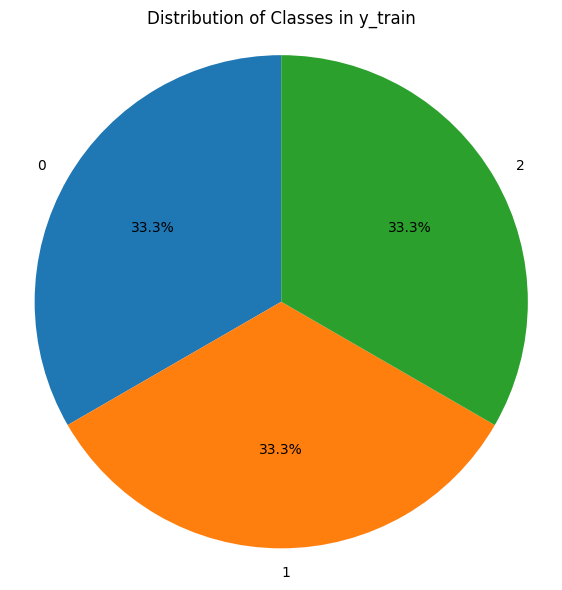

In [9]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = df['Species'].unique()

# Count the number of data points for each class
class_counts = df['Species'].value_counts().sort_index(ascending=False)

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Classes in y_train")
plt.axis("equal")
plt.show()

In [17]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
1,4.9,3.0,1.4,0.2
38,4.4,3.0,1.3,0.2
7,5.0,3.4,1.5,0.2
82,5.8,2.7,3.9,1.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
34,4.9,3.1,1.5,0.1
117,7.7,3.8,6.7,2.2
128,6.4,2.8,5.6,2.1


In [37]:
modell = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [38]:

modell.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [39]:
modell.fit(X_train, y_train,batch_size=15,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.9243 - accuracy: 0.5250
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.7667
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7507 - accuracy: 0.8250
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.8167
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.8167
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.8167
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.8250
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.8333
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8750
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.8667


In [40]:
loss, accuracy = modell.evaluate(X_test, y_test)

1/1 [==============================] - 0s 196ms/step - loss: 0.4623 - accuracy: 0.9333


In [41]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Loss: 0.46225643157958984
Accuracy: 0.9333333373069763
